<a href="https://colab.research.google.com/github/dheerajpoonia29/bookReview-projectPythonFlask/blob/master/piet-i3-day/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Multiple Linear Regression

This class may not cover certain aspects of linear regression in detail with an example, such as regularization with Ridge, Lasso or Elastic Net or log transformation.

Doing my best to explain all possible steps from data transformation, exploration to model selection and evaluation.

## Data set can be found [Here](https://docs.google.com/spreadsheets/d/1HC-HmezraQ60eL5khlcZQsKUBXPffhfxtObs3OYVsuY/edit?usp=sharing)

This is the Famaous Moneyball Dataset

It provides us the performance of the baseball team for the given year. 
#Problem Statement
“Can we predict the number of wins for the team with the given attributes of each record of team performance?”

# Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing Test files and train files

[Train File](https://docs.google.com/spreadsheets/d/1oVsC1zqcRVWDikOknoJ1dC_SFjwafLIs0UPTXAnwVqA/edit?usp=sharing)

[Test File](https://docs.google.com/spreadsheets/d/1UYgSVElm4qzrTdiFREYDdVNG76Ga34XJryJVisih850/edit?usp=sharing)



In [ ]:
from google.colab import files
uploaded = files.upload()

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


# Load the Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(train.head(2))
print(test.head(2))

   ID   W    G    R    AB  ...   RA       BA       OBA       SLG       OPS
0   1  60  162  558  5336  ...  740  0.23988  0.300207  0.360195  0.660402
1   3  86  161  677  5620  ...  643  0.26548  0.328890  0.364591  0.693480

[2 rows x 24 columns]
   ID    G    R    AB     H  ...   RA        BA       OBA       SLG       OPS
0   2  162  643  5436  1415  ...  770  0.260302  0.319156  0.400110  0.719266
1   4  162  798  5464  1463  ...  795  0.267753  0.334319  0.450769  0.785088

[2 rows x 23 columns]


#Lets Understand the data as we indians are not very close to baseball

In [ ]:
print(train.columns)

Index(['ID', 'W', 'G', 'R', 'AB', 'H', '1B', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'BBHBP', 'SF', 'Outs', 'Outsinplay', 'RA', 'BA',
       'OBA', 'SLG', 'OPS'],
      dtype='object')


## Dataset description
I used the [MLB Glossay](http://m.mlb.com/glossary/)

**ID**:  interpreting the dataset I suppose that this is the ID player (?)

**W**: Win.  A pitcher receives a win when he is the pitcher of record when his team takes the lead for good 

**G**: Games played. A player is credited with having played a game if he appears in it at any point

**R**: Run. A player is awarded a run if he crosses the plate to score his team a run. When tallying runs scored, the way in which a player reached base is not considered. If a player reaches base by an error or a fielder's choice, as long as he comes around to score, he is still credited with a run. If a player enters the game as a pinch-runner and scores, he is also credited with a run.

**AB**: At-Bat. An official at-bat comes when a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. (Whereas a plate appearance refers to each completed turn batting, regardless of the result.)

**H**: Hit. A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice. There are four types of hits in baseball: singles, doubles, triples and home runs. All four are counted equally when deciphering batting average. If a player is thrown out attempting to take an extra base (e.g., turning a single into a double), that still counts as a hit.

**1B**: Single. A single occurs when a batter hits the ball and reaches first base without the help of an intervening error or attempt to put out another baserunner

**2B**: Double. A batter is credited with a double when he hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.

**3B**: Triple. Often called "the most exciting play in baseball," a triple occurs when a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.

**HR**: Home Run. Ok, I don't have doubt about this. But here the definition: A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.

**BB**: Walk: A walk occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.

**SO**: Strikeout. A strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to a hitter. (A foul ball counts as a strike, but it cannot be the third and final strike of the at-bat. A foul tip, which is caught by the catcher, is considered a third strike.)

**SB**: Stolen Base. A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

**CS**: Caught Stealing. A caught stealing occurs when a runner attempts to steal but is tagged out before reaching second base, third base or home plate. This typically happens after a pitch, when a catcher throws the ball to the fielder at the base before the runner reaches it. But it can also happen before a pitch, typically when a pitcher throws the ball to first base for a pickoff attempt but the batter has already left for second.

**HBP**: Hit-by-pitch. A hit-by-pitch occurs when a batter is struck by a pitched ball without swinging at it. He is awarded first base as a result. Strikes supersede hit-by-pitches, meaning if the umpire rules that the pitch was in the strike zone or that the batter swung, the HBP is nullified.

**BBHBP**: (?)

**SF**: Sacrifice Fly. A sacrifice fly occurs when a batter hits a fly-ball out to the outfield or foul territory that allows a runner to score. The batter is given credit for an RBI. (If the ball is dropped for an error but it is determined that the runner would have scored with a catch, then the batter is still credited with a sacrifice fly.)

**Outs**: Out (?). One of baseball's most basic principles, an out is recorded when a player at bat or a baserunner is retired by the team in the field. Outs are generally recorded via a strikeout, a groundout, a popout or a flyout, but MLB's official rulebook chronicles other ways -- including interfering with a fielder -- by which an offensive player can be put out.

**Outsinplay**: (?)

**RA**: (?)

**BA**:  (?)

**OBA**: (?)

**SLG**: Slugging Percentage. Slugging percentage represents the total number of bases a player records per at-bat. Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation.

  **OPS**: On-base Plus Slugging. 


# Exploring data


In [ ]:
train.describe()

,ID,W,G,R,AB,H,1B,2B,3B,HR,BB,SO,SB,CS,HBP,BBHBP,SF,Outs,Outsinplay,RA,BA,OBA,SLG,OPS
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,581.000000,79.413081,158.969019,713.099828,5432.340792,1419.020654,976.506024,262.604131,32.425129,147.485370,522.232358,969.447504,105.707401,48.819277,21.846816,544.079174,17.323580,4013.320138,3043.872633,713.444062,0.261091,0.327273,0.402523,0.729796
std,335.729057,12.536626,11.372186,100.936394,396.338140,130.178377,93.027538,42.435244,10.146172,40.995229,75.146405,183.946570,39.155883,17.055590,28.656809,82.461301,22.231198,290.986155,253.618335,104.803539,0.012078,0.014118,0.032048,0.043866
min,1.000000,37.000000,103.000000,329.000000,3493.000000,797.000000,576.000000,119.000000,11.000000,49.000000,278.000000,396.000000,27.000000,12.000000,0.000000,278.000000,0.000000,2601.000000,2022.000000,343.000000,0.226356,0.284100,0.326515,0.614404
25%,291.000000,71.000000,162.000000,647.000000,5462.000000,1369.000000,937.000000,237.000000,25.000000,116.000000,473.000000,842.000000,77.000000,38.000000,0.000000,495.000000,0.000000,4044.000000,2952.000000,651.000000,0.252307,0.317614,0.378841,0.699169
50%,581.000000,80.000000,162.000000,712.000000,5518.000000,1432.000000,989.000000,267.000000,31.000000,147.000000,521.000000,977.000000,101.000000,47.000000,0.000000,544.000000,0.000000,4085.000000,3072.000000,710.000000,0.261026,0.326602,0.401113,0.728662
75%,871.000000,89.000000,162.000000,783.000000,5583.000000,1499.000000,1037.000000,289.000000,38.000000,176.000000,571.000000,1093.000000,130.000000,58.000000,50.000000,597.000000,41.000000,4115.000000,3207.000000,779.000000,0.269683,0.336702,0.425832,0.758919
max,1161.000000,116.000000,164.000000,993.000000,5781.000000,1684.000000,1193.000000,376.000000,67.000000,257.000000,770.000000,1535.000000,314.000000,118.000000,103.000000,802.000000,70.000000,4212.000000,3447.000000,1103.000000,0.292515,0.363665,0.483839,0.845694


We can see that the min and max and std say us that there are variability on the data

In [ ]:
print(train.isnull().sum())
print(train.info())

ID            0
W             0
G             0
R             0
AB            0
H             0
1B            0
2B            0
3B            0
HR            0
BB            0
SO            0
SB            0
CS            0
HBP           0
BBHBP         0
SF            0
Outs          0
Outsinplay    0
RA            0
BA            0
OBA           0
SLG           0
OPS           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          581 non-null    int64  
 1   W           581 non-null    int64  
 2   G           581 non-null    int64  
 3   R           581 non-null    int64  
 4   AB          581 non-null    int64  
 5   H           581 non-null    int64  
 6   1B          581 non-null    int64  
 7   2B          581 non-null    int64  
 8   3B          581 non-null    int64  
 9   HR          581 non-null    int64  
 10  B

Wow, we don't have missing value. What about on test fiel?

In [ ]:
print(test.isnull().sum())
print(test.info())

ID            0
G             0
R             0
AB            0
H             0
1B            0
2B            0
3B            0
HR            0
BB            0
SO            0
SB            0
CS            0
HBP           0
BBHBP         0
SF            0
Outs          0
Outsinplay    0
RA            0
BA            0
OBA           0
SLG           0
OPS           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          581 non-null    int64  
 1   G           581 non-null    int64  
 2   R           581 non-null    int64  
 3   AB          581 non-null    int64  
 4   H           581 non-null    int64  
 5   1B          581 non-null    int64  
 6   2B          581 non-null    int64  
 7   3B          581 non-null    int64  
 8   HR          581 non-null    int64  
 9   BB          581 non-null    int64  
 10  SO          581 n

The data is good. No missing values

#Visualizing the data

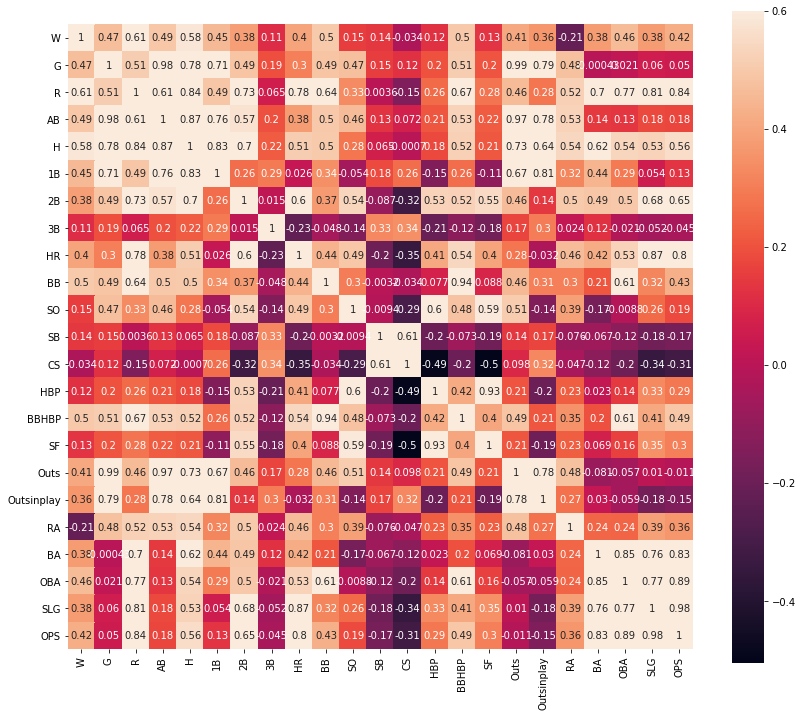

In [ ]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('ID',axis=1).corr(), vmax=0.6, square=True, annot=True)

# Examine the corelation of the Data





Text(0.5, 1.0, 'W vs SO')

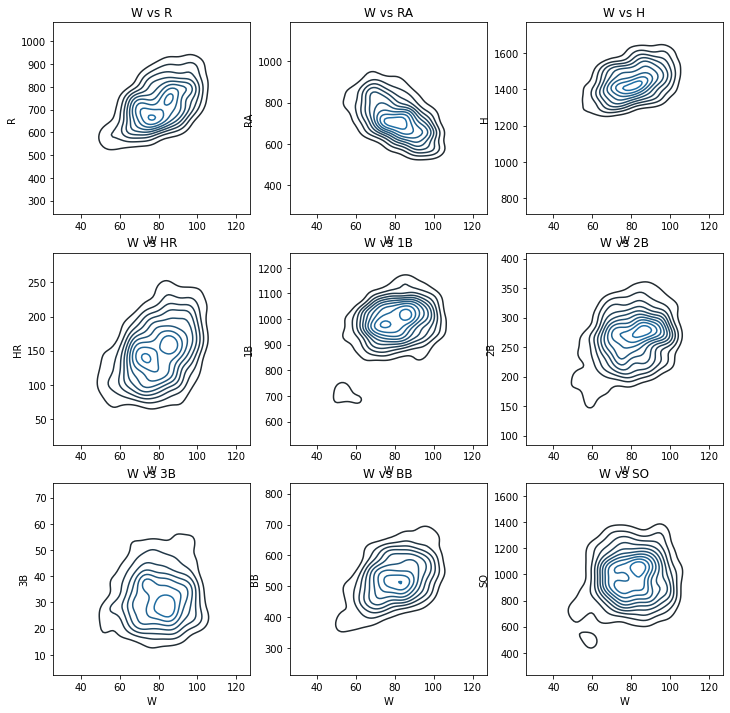

In [ ]:
fig, (axarr1, axarr2, axarr3) = plt.subplots(3, 3, figsize=(12, 12))
# sns.kdeplot(train.W, ax=axarr1[0])
sns.kdeplot(train.W, train.R, ax=axarr1[0])
axarr1[0].set_title("W vs R")
sns.kdeplot(train.W, train.RA, ax=axarr1[1]) 
axarr1[1].set_title("W vs RA")
sns.kdeplot(train.W, train.H, ax=axarr1[2])
axarr1[2].set_title("W vs H")
sns.kdeplot(train.W, train.HR, ax=axarr2[0])
axarr2[0].set_title("W vs HR")
sns.kdeplot(train.W, train['1B'], ax=axarr2[1])
axarr2[1].set_title("W vs 1B")
sns.kdeplot(train.W, train['2B'], ax=axarr2[2])
axarr2[2].set_title("W vs 2B")
sns.kdeplot(train.W, train['3B'], ax=axarr3[0])
axarr3[0].set_title("W vs 3B")
sns.kdeplot(train.W, train.BB, ax=axarr3[1])
axarr3[1].set_title("W vs BB")
sns.kdeplot(train.W, train.SO, ax=axarr3[2])
axarr3[2].set_title("W vs SO")



# Preparing for modeling


In [ ]:
train.columns

Index(['ID', 'W', 'G', 'R', 'AB', 'H', '1B', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'BBHBP', 'SF', 'Outs', 'Outsinplay', 'RA', 'BA',
       'OBA', 'SLG', 'OPS'],
      dtype='object')

In [ ]:
cols = ['G', 'R', 'AB', 'H', 'BB','BBHBP', 'Outs', 'RA', 'BA', 'OPS', '3B', 'SO', 'CS']
ttrain, ttest = train_test_split(train, test_size = 0.2)
train_x = ttrain[cols]
#rain_x = ttrain
train_target = ttrain.W

test_x = ttest[cols]
#est_x = ttest
test_target = ttest.W

We will try to automatize feature selection

In [ ]:
# feature extraction
train_cols = SelectKBest(score_func=chi2, k=15)
fit = train_cols.fit(ttrain.drop(['W', 'ID'], axis=1), ttrain.W)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(ttrain.drop(['W', 'ID'], axis=1))
# Summarize selected features
print(features[0:5, :])
print(fit.get_support())


[2.442e+02 3.153e+03 8.599e+03 3.089e+03 1.793e+03 8.641e+02 2.129e+02
 1.354e+03 1.768e+03 4.043e+03 8.825e+02 2.548e+02 2.577e+03 2.013e+03
 2.016e+03 6.048e+03 4.379e+03 2.401e+03 7.279e-02 8.782e-02 3.053e-01
 3.511e-01]
[[ 734. 5641. 1499. 1067.  285.  115.  506.  915.  112.    0.  506.    0.
  4142. 3227.  818.]
 [ 670. 5450. 1353.  969.  227.  113.  550. 1023.  121.    0.  550.    0.
  4097. 3074.  626.]
 [ 570. 5396. 1326. 1030.  170.   88.  511.  909.   62.    0.  511.    0.
  4070. 3161.  655.]
 [ 804. 5605. 1543. 1045.  294.  177.  549.  981.  200.   54.  603.   58.
  4062. 3081.  750.]
 [ 673. 4886. 1278.  891.  214.  144.  517.  916.  131.    0.  517.    0.
  3608. 2692.  673.]]
[False  True  True  True  True  True False  True  True  True  True False
  True  True  True  True  True  True False False False False]


In [ ]:
dummy = ttrain.drop(['W', 'ID'], axis=1)
dummy.reset_index(drop=True, inplace=True)
dummy.iloc[:, fit.get_support()]
dummy_columns = ttrain.drop(['W', 'ID'], axis=1).columns
#print(dummy[fit.get_support()])

In [ ]:
columns_selectkBest = dummy_columns[fit.get_support()]
train_x_selectKBest = ttrain[columns_selectkBest]
test_x_selectKBest = ttest[columns_selectkBest]

In [ ]:
regressor = linear_model.LinearRegression()
rfe = RFE(regressor, 20)
fit = rfe.fit(ttrain.drop(['ID', 'W'], axis=1), ttrain.W)
print("Num Features: {}".format(fit.n_features_)) 
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

columns_rfe = dummy_columns[fit.get_support()]
train_x_rfe = ttrain[columns_rfe]
test_x_rfe = ttest[columns_rfe]
print(train_x_rfe.columns)
print(test_x_rfe.columns)

Num Features: 20
Selected Features: [ True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1 1 1 1]
Index(['G', 'R', 'AB', 'H', '1B', '2B', '3B', 'HR', 'BB', 'SO', 'HBP', 'BBHBP',
       'SF', 'Outs', 'Outsinplay', 'RA', 'BA', 'OBA', 'SLG', 'OPS'],
      dtype='object')
Index(['G', 'R', 'AB', 'H', '1B', '2B', '3B', 'HR', 'BB', 'SO', 'HBP', 'BBHBP',
       'SF', 'Outs', 'Outsinplay', 'RA', 'BA', 'OBA', 'SLG', 'OPS'],
      dtype='object')


# Modeling


In [ ]:
regressor = linear_model.LinearRegression()
regressor.fit(train_x, train_target)
pred =  regressor.predict(test_x)
print(mean_squared_error(test_target, pred))
print(r2_score(test_target, pred))
print('Coefficients: \n', regressor.coef_)

12.520660007878774
0.9268990911833576
Coefficients: 
 [ 9.662e-01  9.187e-02 -2.770e+10  2.770e+10 -9.224e-03  1.082e-02
  2.770e+10 -1.039e-01  3.108e+02  2.075e+01 -3.085e-03 -7.048e-04
 -8.128e-03]


If you wish to see other possible ways to handel the data please visit [here](https://drive.google.com/file/d/1LwqJz8KqdEaPRuAZzrBl1z_0C32ln5fk/view?usp=sharing)